In [29]:
import pandas as pd
import numpy as np

In [30]:
# import configurations (file paths, etc.)
import yaml
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper
    
configFile = '../cluster/data/medinfmk/side-effects/config/config.yml'

with open(configFile, 'r') as ymlfile:
    cfg = yaml.load(ymlfile, Loader=Loader)
    
#print(cfg)

In [31]:
pathInput = cfg['filePaths']['dirRaw']
pathOutput = cfg['filePaths']['dirProcessed']
# path to store python binary files (pickles)
# in order not to recalculate them every time
pathPickles = cfg['filePaths']['dirProcessedFiles']['dirPickles']

In [32]:
# List of Drug ID - Side effect pairs
filePathDrugSE = pathOutput + cfg['filePaths']['dirProcessedFiles']['drug-se']
df_SE = pd.read_csv(filePathDrugSE, sep='\t', header=None)
df_SE.columns = ['DrugID', 'SE']

# List of Drug ID - Drug Name pairs
filePathDrugNames = pathInput + cfg['filePaths']['dirRawFiles']['drug-names']
df_DN = pd.read_csv(filePathDrugNames, sep='\t', header=None)
df_DN_ind0 = df_DN.set_index(0)

# Dictionary for replacing the Drug IDs with Drug Names
dict_DN = df_DN_ind0[1].to_dict()

In [33]:
# List of Drug Name - Side effect pairs
df_SE_DrugNames = pd.concat([df_SE['DrugID'].map(dict_DN), df_SE['SE']], axis=1)
df_SE_DrugNames.columns = ['Drug', 'SE']

In [34]:
# "one hot encoding" of the Drug Name - Side effects (binary matrix)
#binMat_SE = pd.get_dummies(df_SE_DrugNames, columns=['SE'])

# group by drug
#binMat_SE_sum = binMat_SE.groupby(['Drug']).sum()

# remove > 1 entries
#binMat_SE_sum[binMat_SE_sum > 1] = 1

In [35]:
#binMat_SE_sum.to_pickle('./pickles/binMat_SE_sum.pkl')
filePathBinmatSEsumPickle = pathPickles + cfg['filePaths']['dirProcessedFiles']['dirPicklesFiles']['binmat-se-sum']
binMat_SE_sum = pd.read_pickle(pathPickles + 'binMat_SE_sum.pkl')

In [36]:
binMat_SE_sum

,SE_5'nucleotidase increased,SE_AIDS dementia complex,SE_Abasia,SE_Abdominal abscess,SE_Abdominal adhesions,SE_Abdominal discomfort,SE_Abdominal distension,SE_Abdominal hernia,SE_Abdominal infection,SE_Abdominal injury,...,SE_Xeroderma,SE_Xerophthalmia,SE_Xerosis,SE_Yawning,SE_Yellow nail syndrome,SE_Yellow skin,SE_Zinc deficiency,SE_Zygomycosis,SE_pH urine decreased,SE_pH urine increased
Drug,,,,,,,,,,,,,,,,,,,,,
"1,25(OH)2D3",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17-hydroxyprogesterone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18F-FDG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18F-flutemetamol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2-hydroxysuccinaldehyde,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4-AP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4-PBA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4-methylpyrazole,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5-ASA,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#from sklearn.preprocessing import StandardScaler

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [39]:
#pc_binMat_SE_sum = pca.fit_transform(binMat_SE_sum)

In [40]:
# DataFrame with the Principal Components
df_pc_binMat_SE = pd.DataFrame(data = pca.fit_transform(binMat_SE_sum), columns = ['PC1', 'PC2'])
# DataFrame with the Drug Names
df_Drug_Names = pd.DataFrame(binMat_SE_sum.index, columns=['Drug'])
# DataFrame with the PCs and Drug Names
df_pc_binMat_SE_Drug = pd.concat([df_Drug_Names, df_pc_binMat_SE], axis=1)

In [41]:
df_pc_binMat_SE_Drug

,Drug,PC1,PC2
0,"1,25(OH)2D3",-0.643906,-0.169124
1,17-hydroxyprogesterone,-2.877031,-0.221562
2,18F-FDG,-3.992605,0.799651
3,18F-flutemetamol,-4.024478,0.786597
4,2-hydroxysuccinaldehyde,-1.999168,-0.268115
5,4-AP,-2.027948,-0.820954
6,4-PBA,-1.915562,-0.441192
7,4-methylpyrazole,-2.314470,0.647323
8,5-ASA,8.272763,-1.893999
9,5-FU,1.101274,-0.205427


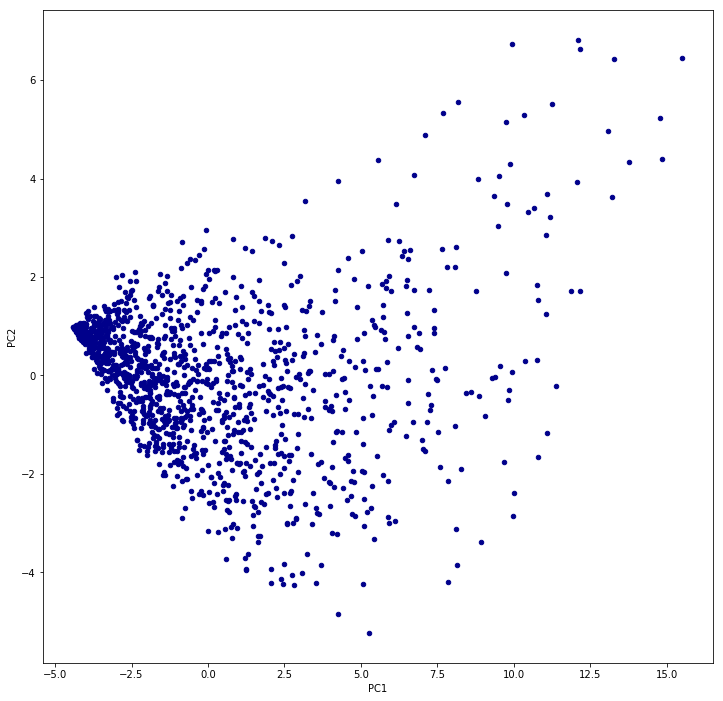

In [43]:
ax_pc = df_pc_binMat_SE_Drug.plot.scatter(x='PC1', y='PC2', c='DarkBlue', figsize=(12,12))

In [44]:
outliers = df_pc_binMat_SE_Drug['PC2'] < -4

In [45]:
df_pc_binMat_SE_Drug[outliers]

,Drug,PC1,PC2
11,5-aza-2'-deoxycytidine,3.535118,-4.225871
39,Cancidas,4.250401,-4.849517
383,cladribine,2.748625,-4.055970
393,clofarabine,2.380482,-4.143012
493,docetaxel,5.055989,-4.232799
540,eribulin,2.063739,-4.207533
563,everolimus,7.860656,-4.187684
985,pazopanib,3.082236,-4.021368
1041,ponatinib,2.799209,-4.261622
1166,sorafenib,2.455453,-4.232345


In [46]:
hist_binMat_SE = binMat_SE_sum.sum(axis=1)
hist_binMat_Drug = binMat_SE_sum.sum(axis=0)

In [47]:
hist_binMat_SE.sort_values()

Drug
mepyramine                    1
Prussian                      1
yttrium                       1
5-methyltetrahydrofolate      1
triclosan                     1
sulfonamide                   2
selenium                      2
DMSO                          2
retinol                       2
pertechnetate                 2
zinc                          3
HMDP                          3
paromomycin                   3
hexachlorophene               3
ZnCl2                         3
AC1O3HA7                      3
crotamiton                    3
eicosapentaenoic              3
monobenzone                   3
malathion                     4
acetate                       4
luliconazole                  4
fluoride                      4
sulconazole                   4
physostigmine                 5
pyridoxine                    5
Brolene                       5
ascorbate                     5
econazole                     5
biguanide                     5
                           ... 
pos

In [48]:
hist_binMat_Drug.sort_values()

SE_5'nucleotidase increased                         1
SE_Infrequent bowel movements                       1
SE_Inferior vena cava syndrome                      1
SE_Infective tenosynovitis                          1
SE_Infective myositis                               1
SE_Infection reactivation                           1
SE_Infected cyst                                    1
SE_Infected bites                                   1
SE_Increased viscosity of bronchial secretion       1
SE_Incomplete precocious puberty                    1
SE_Incision site pain                               1
SE_Incision site haematoma                          1
SE_Infusion site hypersensitivity                   1
SE_Inappropriate affect                             1
SE_Imperforate hymen                                1
SE_Impatience                                       1
SE_Impaired fasting glucose                         1
SE_Immunosuppression                                1
SE_Immunosuppressant drug le

Text(0, 0.5, 'Frequency')

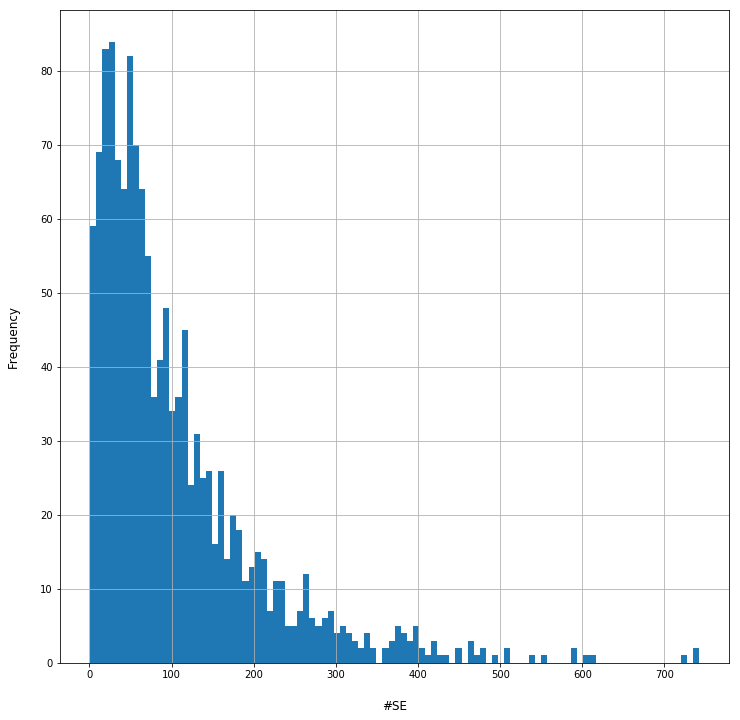

In [49]:
ax_hist_SE = hist_binMat_SE.hist(figsize=(12,12),bins=100)
ax_hist_SE.set_xlabel("#SE", labelpad=20, size=12)
ax_hist_SE.set_ylabel("Frequency", labelpad=20, size=12)

Text(0, 0.5, 'Frequency')

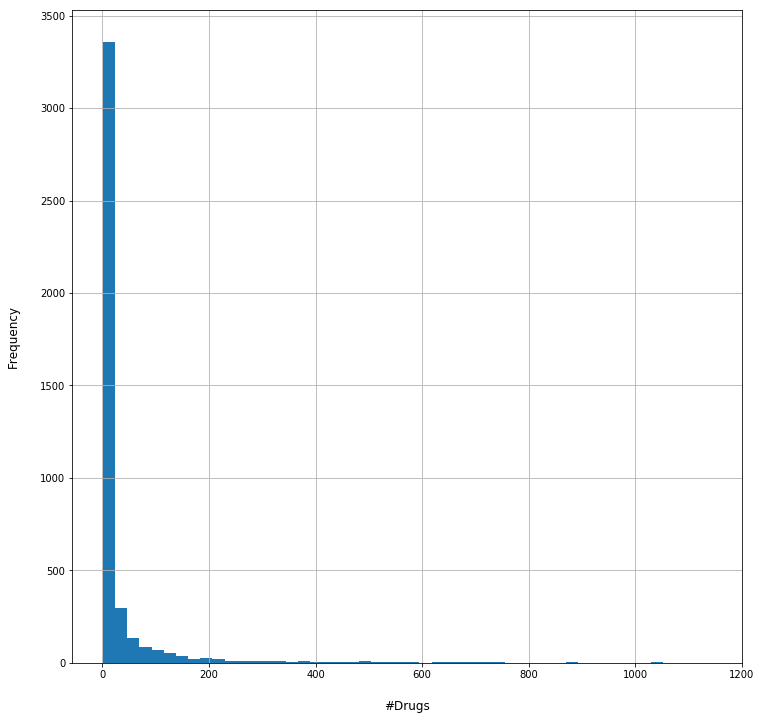

In [50]:
ax_hist_Drug = hist_binMat_Drug.hist(figsize=(12,12),bins=50)
ax_hist_Drug.set_xlabel("#Drugs", labelpad=20, size=12)
ax_hist_Drug.set_ylabel("Frequency", labelpad=20, size=12)

In [51]:
# Maybe implement TF-IDF next?
# https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)

In [53]:
tfidf = transformer.fit_transform(binMat_SE_sum)

In [58]:
type(tfidf)

scipy.sparse.csr.csr_matrix

In [59]:
binMat_SE_tfidf = pd.DataFrame(tfidf.toarray())

In [60]:
binMat_SE_tfidf

,0,1,2,3,4,5,6,7,8,9,...,4241,4242,4243,4244,4245,4246,4247,4248,4249,4250
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.036379,0.036279,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# DataFrame with the Principal Components
df_pc_binMat_SE_tfidf = pd.DataFrame(data = pca.fit_transform(binMat_SE_tfidf), columns = ['PC1', 'PC2'])
# DataFrame with the PCs and Drug Names
df_pc_binMat_SE_Drug_tfidf = pd.concat([df_Drug_Names, df_pc_binMat_SE_tfidf], axis=1)

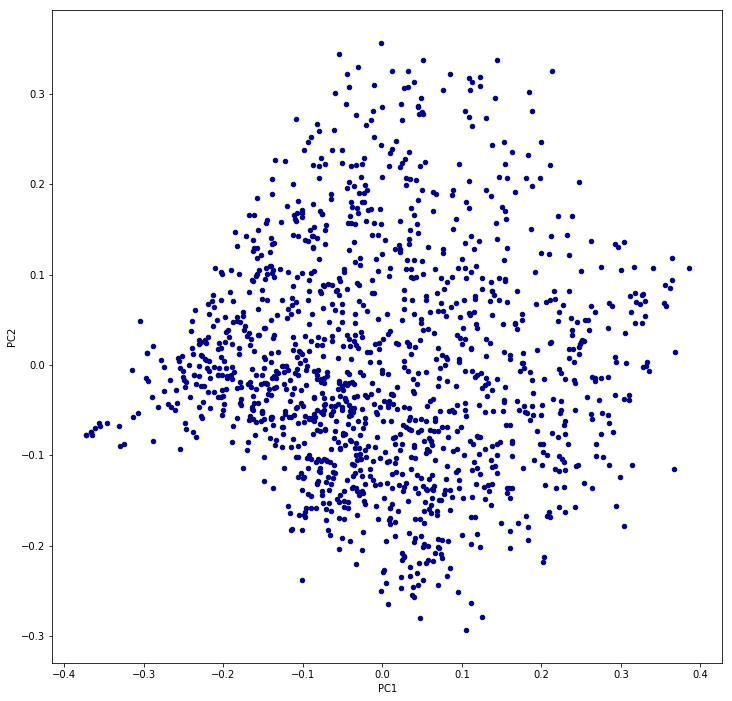

In [62]:
ax_pc_tfidf = df_pc_binMat_SE_Drug_tfidf.plot.scatter(x='PC1', y='PC2', c='DarkBlue', figsize=(12,12))

In [63]:
df_pc_binMat_SE_Drug_tfidf

,Drug,PC1,PC2
0,"1,25(OH)2D3",-0.035064,-0.036055
1,17-hydroxyprogesterone,-0.189128,-0.002207
2,18F-FDG,-0.228361,0.024924
3,18F-flutemetamol,-0.209988,0.107212
4,2-hydroxysuccinaldehyde,-0.082499,-0.071592
5,4-AP,-0.055024,-0.019768
6,4-PBA,-0.040733,-0.051297
7,4-methylpyrazole,-0.092653,0.093854
8,5-ASA,0.209977,-0.162906
9,5-FU,-0.024666,-0.011644


In [71]:
outliers = df_pc_binMat_SE_Drug_tfidf['PC2'] < -0.25
df_pc_binMat_SE_Drug_tfidf[outliers]

,Drug,PC1,PC2
528,emtricitabine,0.037519,-0.254302
540,eribulin,0.125242,-0.278734
573,fenofibric,0.104904,-0.293515
750,lapatinib,0.006803,-0.264428
1104,regorafenib,-0.001128,-0.250008
1188,sunitinib,0.094687,-0.251217
1208,temsirolimus,0.111334,-0.263308
1248,tipranavir,0.047679,-0.280710
1266,trametinib,0.040295,-0.257397


In [ ]:
# #############################################################################
# Do the actual clustering
from sklearn.cluster import KMeans, MiniBatchKMeans

#km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
    #init_size=1000, batch_size=1000, verbose=opts.verbose)
km = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1,verbose=False)

print("Clustering sparse data with %s" % km)
km.fit(binMat_SE_tfidf)
print()

In [79]:
km.cluster_centers_

array([[ 9.48676901e-20, -4.60785923e-19,  5.42101086e-20, ...,
         5.14996032e-19,  4.33680869e-19, -9.48676901e-20],
       [ 2.46294627e-04,  6.94382152e-04,  7.04731412e-19, ...,
         3.14412629e-04,  6.23416249e-19,  3.85136449e-04],
       [ 2.16840434e-19, -6.50521303e-19,  2.38490882e-03, ...,
         6.50521303e-19,  1.39044464e-03,  2.71050543e-20],
       [ 2.43945489e-19, -6.77626358e-19,  2.19401420e-04, ...,
         2.98155597e-19,  5.96311195e-19,  2.57498016e-19],
       [ 2.71050543e-19,  2.71050543e-19, -7.04731412e-19, ...,
         5.20472321e-04,  6.23416249e-19, -3.11708125e-19]])

In [ ]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()

In [ ]:
if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()